# Choose a Car Profitably [Car Price prediction]

This work has made by Paul Krivchenia in cooperation with Vitaliy Burlakov (a.k.a Vetak8):
#### [My GitHub](https://github.com/Paull-dark)
#### [Vetak's GitHub](https://github.com/vetak8)
#### [Vetak's Kaggle](https://www.kaggle.com/vitaliyburlakov)

<img src = 'https://i.ytimg.com/vi/Qr9S2zYfAfs/maxresdefault.jpg' width= '800px'>

# Description

The Target of this project is to:
- Collect a dataset from outside sources for training a model. 
- To make a exploratory data analysis 
- Try to predict the price of a car with given technical and commercial car's parameters.

# Note
The training data already collected from auto.ru  by using dedicated notebook. You may find it in GitHUB in the link below:

#### [GitHub_Data_Collector](https://github.com/Paull-dark/Skill_Factory/tree/master/module_6_Cars)

<a id="sec1.1"></a>
## [Features Defination](sec1.1)

**BodyType** -  The type of the Body of car .

**Brand** - Name of brand.

**color** - Color of the car (hex).

**complectation_dict** - specified complecttion of the car.

**description** - human's description of the car (given by seller).

**engineDisplacement** - Working volume of the engine (in $mm^3$).

**enginePower** - Power in Horses.

**equipment** - set of auxilliary equipment.

**fuelType - Diesel, gasoline electric etc.

**image** - url of the image of car.

**mileage** - How many kilometers car passed up to the date.

**modelDate** - When particular model has been designed.

**name** - shows bolume of engine and horse power.

**numberOfDoors** - The number of doors in a single car.

**parsing_unixtime** - time of parsing the data.

**PriceCurrency** - The currency of the car's price.

**productionDate** - The date when the car has been released from factory.

**sell_id** - id number of the seller.

**super_gen** - dictionary with data like: model, price_segment.

**vehicleConfiguration** - shows body type, type of gear, volume of engine.

**vehicleTransmission** - Gear type.

**vendor** - Contry of model's origin.

**Владельцы** - How many owners had particular car before.

**Владение** - How long the seller own a particular car.

**ПТС** - Shows whether the car's documents in original state.

**Привод** - Wheel drive (2WF,4WD etc).

**Руль** - Left or right Wheel.

**Состояние** - condition of a car (good or not).

**Таможня** - whether Custom clearance performed.

**price** - price in RUB.

<a id="sec2"></a>
# [INDEX](#sec2)

<a id="sec1"></a>
1. [Description](#sec1)
   * [1.1 Features Defination](#sec1.1)
2. [INDEX](#sec2)
3. [IMPORT LIBRARRIES](#sec3)
4. [Functions and Classes](#sec4)
5. [Load and Chek the Dataset](#sec5)

In [1]:
import os
import pandas as pd
import numpy as np
import re
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from jupyterthemes import jtplot

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_rows', 50)  # Show more rows
pd.set_option('display.max_columns', 50)  # Show more columns
plt.style.use('ggplot')  # Nice plotting

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# Lock a RANDOM SEED to keep experiments reproducible.
np.random.seed(42)

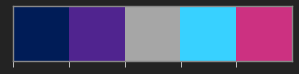

In [3]:
# Set project colors
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff','#cc3181']
sns.palplot(sns.color_palette(colors))

<a id="sec4"></a>
# [Functions and Classes](#sec4)
[(INDEX)](#sec2)

In [4]:
#  The function has been taken from Vladimir Yushmanov 【SF-DST】
def compare_data_sets(train_df,test_df):
    
    list_of_names1 = list(train_df.columns)
    temp_dict = {}
    temp_dict['feature_train'] = list_of_names1
    temp_dict['type_train'] = train_df.dtypes
    temp_dict['sample_train'] = train_df.loc[1].values
    temp_dict['# unique_train'] = train_df.nunique().values
    temp_df1 = pd.DataFrame.from_dict(temp_dict)
    
    
    list_of_names2 = list(test_df.columns)
    temp_dict2 = {}
    temp_dict2['feature_test'] = list_of_names2
    temp_dict2['type_test'] = test_df.dtypes
    temp_dict2['sample_test'] = test_df.loc[1].values
    temp_dict2['# unique_test'] = test_df.nunique().values
    temp_df2 = pd.DataFrame.from_dict(temp_dict2)
    
    temp_insert = pd.DataFrame(columns=['< - >'])
    
    temp_df = pd.concat([temp_df1,temp_insert, temp_df2], axis=1, sort=False)
    temp_df.reset_index(inplace = True)
    del temp_df['index']
    temp_df['< - >'] = '| - |'
    display(temp_df)

    temp_dict3 = {}
    temp_df3= pd.DataFrame(temp_df)
    temp_list  = []
    temp_list2  = []
    temp_list3  = []
    temp_list4  = []
    temp_list5  = []

    for i in range(len(temp_df)):
        if str(temp_df3['type_train'][i]) != str(temp_df3['type_test'][i]):
            temp_list.append(temp_df3['feature_train'][i])
            temp_list2.append(temp_df3['feature_test'][i])
            temp_list3.append(str(temp_df3['type_train'][i]) + ' != ' + str(temp_df3['type_test'][i]))
            temp_list4.append(i)
        if temp_df3['# unique_test'][i]>0 and temp_df3['# unique_train'][i]/temp_df3['# unique_test'][i] > 2:
            temp_list5.append(i)
            
    temp_dict3['index']= temp_list4
    temp_dict3['feature_train']= temp_list
    temp_dict3['не совпадают типы'] = temp_list3
    temp_dict3['feature_test']= temp_list2

    temp_df4 = pd.DataFrame.from_dict(temp_dict3)
    temp_df4.set_index('index',inplace=True)

    print(f'Резюме:\n 1. Не совпали типы в:= {len(temp_df4)} столбцах\n')
    print(f'2. Уникальные значения различаются в:= {len(temp_list5)} столбцах {temp_list5}')
    display(temp_df4)

In [5]:
def pandas_report(data,title,minimal=True):
    ''' Function is called for generating of dataset profile-report'''

    profile = data.profile_report(title=title,
                                  progress_bar=False,
                                  minimal=minimal,
                                  correlations={
                                      'pearson': {
                                          'calculate': True
                                      },
                                      'spearman': {
                                          'calculate': True
                                      },
                                      'kendall': {
                                          'calculate': False
                                      },
                                      'phi_k': {
                                          'calculate': False
                                      },
                                      'cramers': {
                                          'calculate': False
                                      }
                                  },
                                  interactions={
                                      'continuous': True,
                                      'targets': []
                                  },
                                  missing_diagrams={
                                      'heatmap': True,
                                      'dendrogram': False,
                                      'matrix': True
                                  },
                                  vars={'cat': {
                                      'n_obs': 10
                                  }})

    return profile

In [6]:
def get_boxplot(data, X_axis, Y_axis, hue=None):
    '''Function is called to plot boxplots'''
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.boxplot(x=X_axis, y=Y_axis, hue=hue, data=data, palette=colors)
    plt.xticks(rotation=45)
    ax.set_title(f'Boxplot for {X_axis} and {Y_axis}', fontsize=14)
    plt.show()

In [7]:
class Encoder:
    def __init__(self, data):
        self.data = data

    def label_encoder(self, column):
        le = LabelEncoder()
        self.data[column] = le.fit_transform(self.data[column])

    def hot_encoder(self, column):
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
        aux_df = pd.DataFrame(ohe.fit_transform(self.data[[column]]))
        aux_df.columns = ohe.get_feature_names([f'hot_{column}'])
        self.data = self.data.drop(col, axis=1)
        self.data = pd.concat([self.data, aux_df], axis=1)
        return self.data 

In [25]:
def missing_vars(data, column, random_proba=True):
    '''Function is called for filling of missing data'''
    # With using probability and random choise

    if random_proba:
        col_name = data[column].value_counts().index.to_list(
        )  # get list of values
        col_distr = data[column].value_counts(
            normalize=True).values  # get l;ist of probs
        missing = data[col].isnull()  # flag of missing val
        # substitute values from the list of names in accordance with the probability of meeting the name
        data.loc[missing, [column]] = np.random.choice(col_name,
                                                    size=len(data[missing]),
                                                    p=col_distr)

    # Using  most common in  column
    data[col] = data[col].fillna(data[col].value_counts().index[0])

In [9]:
def corr_matrix(data, det=True, pltx=10, plty=10):
    '''Funcion is called for making correlation matrix'''
    
    X = data.corr()
    if det:
        
        evals,evec = np.linalg.eig(X)
        ev_product = np.prod(evals)
    
        print(f'Rank of Matrix: {np.linalg.matrix_rank(X)}')
        print(f'Determinant of matrix: {np.round(ev_product,4)}')
        print(f'Shape of matrix: {np.shape(X)}')
    
    plt.figure(figsize=(pltx,plty))
    sns.heatmap(X,vmin=0,vmax=.9,annot=True,square=True)
    plt.show()

<a id="sec5"></a>
# [5.Load and Chek the Dataset](#sec5)
[(INDEX)](#sec2)

<a id="sec5"></a>
## [5.1 Load train and test sets](#sec5.1)
[(INDEX)](#sec2)

In [16]:
df_train = pd.read_csv('train_parsed_18_05_21.csv',low_memory=False)
df_test = pd.read_csv('test.csv')

In [17]:
df_test['price'] = np.nan

# let's mark where is train where is test set.
df_train['sample'] = 1  # train
df_test['sample'] = 0  # test

In [12]:
df_test.sample(1)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price,sample
19026,внедорожник 5 дв.,TOYOTA,https://auto.ru/cars/used/sale/toyota/rav_4/11...,чёрный,NaN,ЛОТ: 01215604\nФаворит Хофф\n\nВы можете получ...,2.0 LTR,150 N12,"{""tinted-glass"":true,""airbag-driver"":true,""iso...",бензин,https://autoru.naydex.net/LxPU17803/f5b8d77S/u...,121490,2000,"{""code"":""RAV_4"",""name"":""RAV4"",""ru_name"":""Рав4""...",RAV_4,2.0 AT (150 л.с.) 4WD,5,1603286281,RUB,2001,1100331690,"{""id"":""6503031"",""displacement"":1998,""engine_ty...",ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,JAPANESE,3 или более,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен,NaN,0


In [14]:
df_train.sample(1)

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price_segment,price,sample
30381,Внедорожник 5 дв.,Toyota,NaN,FAFBFB,"{'id': '8276273', 'name': 'Престиж', 'availabl...","Все автомобили, представленные в продаже, прох...",3456.0,273.0,"{'cruise-control': True, 'tinted-glass': True,...",бензин,//avatars.mds.yandex.net/get-autoru-vos/212743...,104000,2010.0,"{'code': 'HIGHLANDER', 'name': 'Highlander', '...",HIGHLANDER,3.5 AT (273 л.с.) 4WD,5.0,today,RUR,2012,1103542346,"{'id': '6479332', 'name': 'II (U40) Рестайлинг...",useless_col,AUTOMATIC,JAPANESE,2.0,useless_col,ORIGINAL,полный,LEFT,True,True,MEDIUM,1465000.0,1


In [15]:
print(
    f'Shape of Train Dataset:{df_train.shape}\nShape of Test Dataset:{df_test.shape} \n'
)

Shape of Train Dataset:(110772, 35)
Shape of Test Dataset:(34686, 34) 



Rename columns removing spaces and substituting capital letters

In [18]:
columns = {
    'bodyType': 'body_type',
    'engineDisplacement': 'engine_displacement',
    'enginePower': 'engine_power',
    'fuelType': 'fuel_type',
    'modelDate': 'model_date',
    'numberOfDoors': 'doors_count',
    'priceCurrency': 'price_currency',
    'productionDate': 'production_date',
    'vehicleConfiguration': 'vehicle_configuration',
    'vehicleTransmission': 'vehicle_transmission',
    'Владельцы': 'owner_count',
    'Владение': 'owning_period',
    'ПТС': 'car_passport',
    'Привод': 'wheel_drive',
    'Руль': 'wheel_location',
    'Состояние': 'condition',
    'Таможня': 'custom'
}

In [19]:
df_test.rename(columns=columns,inplace=True)
df_train.rename(columns=columns,inplace=True)

For the proper processing of features, we need to combine train and test sets into a one dataset.

However, as we scrapped data from web, we have to compare whar we scrapped with test set and then fix it 

In [18]:
compare_data_sets(df_train,df_test)

,feature_train,type_train,sample_train,# unique_train,< - >,feature_test,type_test,sample_test,# unique_test
0,body_type,object,Внедорожник 5 дв.,112,| - |,body_type,object,лифтбек,24.0
1,brand,object,BMW,15,| - |,brand,object,SKODA,12.0
2,car_url,float64,NaN,0,| - |,car_url,object,https://auto.ru/cars/used/sale/skoda/octavia/1...,34686.0
3,color,object,FAFBFB,16,| - |,color,object,чёрный,16.0
4,complectation_dict,object,{'id': '0'},3935,| - |,complectation_dict,object,NaN,2364.0
5,description,object,"Автомобиль в идеальном состоянии ,куплен в мар...",44907,| - |,description,object,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,31732.0
6,engine_displacement,float64,2993.0,433,| - |,engine_displacement,object,1.6 LTR,55.0
7,engine_power,float64,245.0,328,| - |,engine_power,object,110 N12,315.0
8,equipment_dict,object,{},34472,| - |,equipment_dict,object,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",23705.0
9,fuel_type,object,дизель,6,| - |,fuel_type,object,бензин,5.0


Резюме:
 1. Не совпали типы в:= 8 столбцах

2. Уникальные значения различаются в:= 2 столбцах [0, 6]


,feature_train,не совпадают типы,feature_test
index,,,
2,car_url,float64 != object,car_url
6,engine_displacement,float64 != object,engine_displacement
7,engine_power,float64 != object,engine_power
12,model_date,float64 != int64,model_date
16,doors_count,float64 != int64,doors_count
17,parsing_unixtime,object != int64,parsing_unixtime
25,owner_count,float64 != object,owner_count
32,price_segment,object != nan,NaN


We can see that 8 columns in test and train datasets have different datatypes. We have to threat it before stacking datasets.

- CAR_URL -ignore this feature and delete from test set

- Engine_displacement - convert data from train set to $liters$ and clear letters from test set

- Engine_power - Clear trash from test set and convert it to float64 type

- numberOfDoors - convert float64 in train set to int64(same with test set)

- parsing_unixtime - delete this column. (we did not include this data during parsing due to lack of brain :) )


<a id="sec5.2"></a>
## [5.2 Pre-processing before stacking data sets](#sec5.2)
[(INDEX)](#sec2)

In [20]:
# drop 100% usless cols
df_test = df_test.drop(['car_url','parsing_unixtime'],axis=1)
df_train = df_train.drop(['car_url','parsing_unixtime'],axis=1)

**[engineDisplacement column]**

In [21]:
# convert mm to liters in train set
df_train['engine_displacement'] = round(df_train['engine_displacement']/1000, 1)

# clear 'LTR in test set'
df_test['engine_displacement'] = df_test['engine_displacement'].apply(
    lambda x: str(x).replace('LTR', ''))

# convert object to float in test set
df_test['engine_displacement'] = df_test['engine_displacement'].apply(
    lambda x: np.nan if x.strip() == '' else float(x))

**[enginePower column]**

In [22]:
# clear 'N12 in test set'
df_test['engine_power'] = df_test['engine_power'].apply(
    lambda x: str(x).replace('N12', ''))

# convert object to float in test set
df_test['engine_power'] = df_test['engine_power'].apply(
    lambda x: np.nan if x.strip() == '' else float(x))

**[Владельцы]**

In [23]:
# we know that test set has only 3 categories of data: 1 owner, 2 owners, 3 or more.
# Let's do same for train set
df_train['owner_count'] = df_train['owner_count'].map({1.0:'1',2.0:'2',3.0:'3',4.0:'3'}).astype('category')

# And clear test set from usless words.
df_test['owner_count'] = df_test['owner_count'].apply(lambda x: x[0]).astype('category')

**[modelDate]**

In [26]:
# figure out the missing values issue and change type to int64 for cols:
cols_to_int64 = ['model_date', 'doors_count']

for col in cols_to_int64:
    missing_vars(df_train, col)
    df_train[col] = df_train[col].astype('int64')

**[bodyType]**

With a reference to a comparison of train and test data frames we may note that **bodyType** in train set has much more unique values (112 against 24 in test set), however, in fact the data varies not too much. It happened because some additionla description had been added into a train set. We will precess it in feature engineering section.
Here we just change upercase to lowercase.

In [27]:
df_train['body_type'] = list(str(x).lower().replace('.','') for x in df_train['body_type'])
df_test['body_type'] = list(str(x).lower().replace('.','') for x in df_test['body_type'])

**[color]**

In scrapped data colores presented in hex code, while in test data it is presented by russian names of color.

Bring it in line with the test set.

In [28]:
colors = {'FFD600':'Жёлтый',
          "660099":'Пурпурный',
          "DEA522":'Золотистый',
          "007F00":'Зелёный',
          "040001":'Чёрный',
          "C49648":'Бежевый',
          "CACECB":'Серебристый',
          "EE1D19":'Красный',
          "0000CC":'Синий',
          "22A0F8":'Голубой',
          "FFC0CB":'Розовый',
          "4A2197":'Фиолетовый',
          "FF8649":'Оранжевый',
          "200204":'Коричневый',
          "97948F":'Серый',
          "FAFBFB":'Белый'}

df_train['color'] = df_train['color'].map(colors)

In [26]:
df_train.sample(1)

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,equipment_dict,fuel_type,image,mileage,model_date,model_info,model_name,name,doors_count,price_currency,production_date,sell_id,super_gen,vehicle_configuration,vehicle_transmission,vendor,owner_count,owning_period,car_passport,wheel_drive,wheel_location,condition,custom,price_segment,price,sample
15387,внедорожник 5 дв,Nissan,Чёрный,{'id': '0'},ЛОТ: 01255350\nFAVORIT MOTORS KIA МКАД\n\nВы м...,2.0,144.0,"{'cruise-control': True, 'asr': True, 'tinted-...",бензин,//avatars.mds.yandex.net/get-autoru-vos/391083...,146913,2013,"{'code': 'QASHQAI', 'name': 'Qashqai', 'ru_nam...",QASHQAI,2.0 CVT (144 л.с.) 4WD,5,RUR,2014,1103160732,"{'id': '20097928', 'name': 'II', 'ru_name': '2...",useless_col,VARIATOR,JAPANESE,1,useless_col,ORIGINAL,полный,LEFT,True,True,MEDIUM,1225611.0,1


**[price_currency]**

Let's change 'RUR' to 'RUB'

In [29]:
df_train['price_currency'] = df_train['price_currency'].map({'RUR': 'RUB'})

**[vehicle_transmission]**

Let's translate from russian to English data in test set.

...do you speak it?

In [30]:
eng_dict = {
    'роботизированная': 'ROBOT',
    'механическая': 'MECHANICAL',
    'автоматическая': 'AUTOMATIC',
    'вариатор': 'VARIATOR'
}

df_test['vehicle_transmission'] = df_test['vehicle_transmission'].map(eng_dict)

**[car_passport]**

Do the same for car_passport

In [31]:
df_test['car_passport'] = df_test['car_passport'].map(
    {'Оригинал': 'ORIGINAL', 'Дубликат': 'DUPLICATE'})

**[wheel_location]**

In [32]:
df_test['wheel_location'] = df_test['wheel_location'].map(
    {'Левый': 'LEFT', 'Правый': 'RIGHT'})

***Condition*** and ***custom*** columns has only one unique value, means it will not give us any usefull information. We will delete them in future section.

Rest of columns will be keep unchangeable for a while

Final verification before merging

In [33]:
df_train = df_train.drop('price_segment',axis=1)

In [31]:
compare_data_sets(df_train,df_test)

,feature_train,type_train,sample_train,# unique_train,< - >,feature_test,type_test,sample_test,# unique_test
0,body_type,object,внедорожник 5 дв,110,| - |,body_type,object,лифтбек,24
1,brand,object,BMW,15,| - |,brand,object,SKODA,12
2,color,object,Белый,16,| - |,color,object,чёрный,16
3,complectation_dict,object,{'id': '0'},3935,| - |,complectation_dict,object,NaN,2364
4,description,object,"Автомобиль в идеальном состоянии ,куплен в мар...",44907,| - |,description,object,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,31732
5,engine_displacement,float64,3.0,58,| - |,engine_displacement,float64,1.6,54
6,engine_power,float64,245.0,328,| - |,engine_power,float64,110.0,315
7,equipment_dict,object,{},34472,| - |,equipment_dict,object,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",23705
8,fuel_type,object,дизель,6,| - |,fuel_type,object,бензин,5
9,image,object,//avatars.mds.yandex.net/get-autoru-vos/458170...,50649,| - |,image,object,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,34557


Резюме:
 1. Не совпали типы в:= 0 столбцах

2. Уникальные значения различаются в:= 1 столбцах [0]


,feature_train,не совпадают типы,feature_test
index,,,


Let's finally merge train and test sets

In [32]:
df = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # combine sets

In [36]:
display(df.sample(3))
df.info()

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,equipment_dict,fuel_type,image,mileage,model_date,model_info,model_name,name,doors_count,price_currency,production_date,sell_id,super_gen,vehicle_configuration,vehicle_transmission,vendor,owner_count,owning_period,car_passport,wheel_drive,wheel_location,condition,custom,price,sample
89683,лифтбек,Skoda,Серый,{'id': '0'},Автомобиль в отличном состоянии. Никаких ошибо...,1.8,180.0,"{'cruise-control': True, 'tinted-glass': True,...",бензин,//avatars.mds.yandex.net/get-autoru-vos/196012...,118000,2013,"{'code': 'OCTAVIA', 'name': 'Octavia', 'ru_nam...",OCTAVIA,1.8 AMT (180 л.с.),5,RUB,2013,1101145483,"{'id': '9338208', 'name': 'III (A7)', 'ru_name...",useless_col,ROBOT,EUROPEAN,3,useless_col,ORIGINAL,передний,LEFT,True,True,990000.0,1
25087,хэтчбек 5 дв,VOLKSWAGEN,чёрный,"{""id"":""20071162"",""name"":""Trendline"",""available...","Автомобиль на ходу, работает исправно. \n\nМаш...",1.4,122.0,"{""tinted-glass"":true,""esp"":true,""airbag-driver...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,168000,2009,"{""code"":""GOLF_PLUS"",""name"":""Golf Plus"",""ru_nam...",GOLF_PLUS,1.4 AMT (122 л.с.),5,RUB,2009,1096845802,"{""id"":""20463676"",""displacement"":1390,""engine_t...",HATCHBACK_5_DOORS ROBOT 1.4,ROBOT,EUROPEAN,3,NaN,ORIGINAL,передний,LEFT,Не требует ремонта,Растаможен,NaN,0
132739,хэтчбек 5 дв,Kia,Голубой,{'id': '0'},ЛОТ: 01263717\nFAVORIT MOTORS KIA МКАД\n\nВы м...,1.6,123.0,"{'tinted-glass': True, 'airbag-driver': True, ...",бензин,//avatars.mds.yandex.net/get-autoru-vos/492846...,99162,2011,"{'code': 'RIO', 'name': 'Rio', 'ru_name': 'Рио...",RIO,4-speed 1.6 AT (123 л.с.),5,RUB,2013,1103531197,"{'id': '7694524', 'name': 'III', 'ru_name': '3...",useless_col,AUTOMATIC,KOREAN,1,useless_col,ORIGINAL,передний,LEFT,True,True,720000.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145458 entries, 0 to 145457
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   body_type              145458 non-null  object  
 1   brand                  145458 non-null  object  
 2   color                  145458 non-null  object  
 3   complectation_dict     117190 non-null  object  
 4   description            143638 non-null  object  
 5   engine_displacement    145401 non-null  float64 
 6   engine_power           145456 non-null  float64 
 7   equipment_dict         135462 non-null  object  
 8   fuel_type              145458 non-null  object  
 9   image                  142531 non-null  object  
 10  mileage                145458 non-null  int64   
 11  model_date             145458 non-null  int64   
 12  model_info             145458 non-null  object  
 13  model_name             145458 non-null  object  
 14  name                

<a id="sec5.3"></a>
## [5.3 Missing Values](#sec5.3)
[(INDEX)](#sec2)

Let's observe an empty data

body_type - 0%
brand - 0%
color - 0%
complectation_dict - 19%
description - 1%
engine_displacement - 0%
engine_power - 0%
equipment_dict - 7%
fuel_type - 0%
image - 2%
mileage - 0%
model_date - 0%
model_info - 0%
model_name - 0%
name - 0%
doors_count - 0%
price_currency - 1%
production_date - 0%
sell_id - 0%
super_gen - 0%
vehicle_configuration - 0%
vehicle_transmission - 0%
vendor - 0%
owner_count - 14%
owning_period - 16%
car_passport - 1%
wheel_drive - 0%
wheel_location - 0%
condition - 1%
custom - 0%
price - 25%
sample - 0%


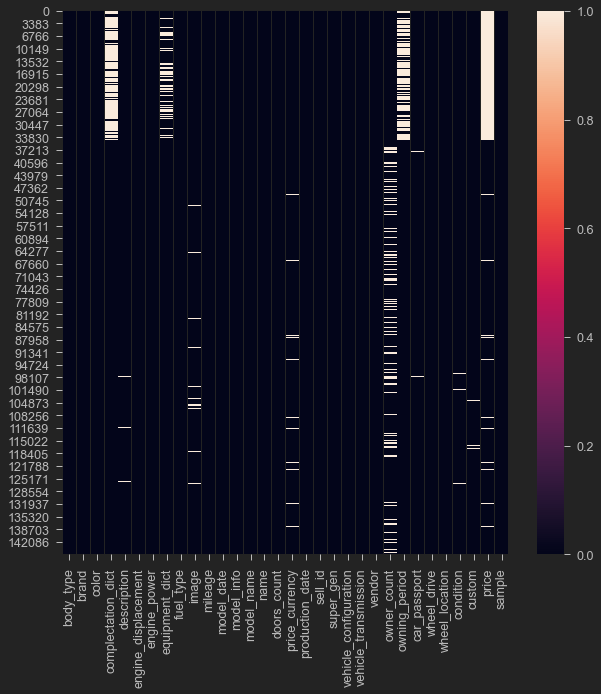

In [33]:
# Plot missing values
cols = df.columns
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[cols].isnull(), )

# Show in percents
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

<a id="sec5.3"></a>
## [5.3 Pandas Profiling](#sec5.3)
[(INDEX)](#sec2)

In [42]:
# We won't include some colums in the report
cols_exclude = [
    'complectation_dict', 'sample', 'image', 'name', 'super_gen',
    'equipment_dict', 'price_currency', 'owning_period',
    'vehicle_configuration'
]

data_profile = pandas_report(df_train.drop(cols_exclude, axis=1), 'car_price_prediction')
# Check your folder)
data_profile.to_file('pandas_report.html')  

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,equipment_dict,fuel_type,image,mileage,model_date,model_info,model_name,name,doors_count,price_currency,production_date,sell_id,super_gen,vehicle_configuration,vehicle_transmission,vendor,owner_count,owning_period,car_passport,wheel_drive,wheel_location,condition,custom,price,sample
76,седан,BMW,Синий,{'id': '0'},"Оригинальный М пакет, sport edition, автомобил...",2.5,218.0,"{'cruise-control': True, 'body-kit': True, 'ti...",бензин,//avatars.mds.yandex.net/get-autoru-vos/167674...,222000,2007,"{'code': '5ER', 'name': '5 серии', 'ru_name': ...",5ER,525i 2.5 AT (218 л.с.),4,RUB,2008,1103305529,"{'id': '2305607', 'name': 'V (E60/E61) Рестайл...",useless_col,AUTOMATIC,EUROPEAN,3,useless_col,ORIGINAL,задний,LEFT,True,True,820000.0,1
190,седан,BMW,Синий,"{'id': '21766136', 'name': '330d xDrive M Spec...",Только в РОЛЬФ ПРЕМИУМ лимитированная Online s...,3.0,265.0,"{'cruise-control': True, 'asr': True, 'esp': T...",дизель,//avatars.mds.yandex.net/get-autoru-vos/190660...,0,2018,"{'code': '3ER', 'name': '3 серии', 'ru_name': ...",3ER,330d xDrive 3.0d AT (265 л.с.) 4WD,4,RUB,2021,1103144814,"{'id': '21398591', 'name': 'VII (G2x)', 'ru_na...",useless_col,AUTOMATIC,EUROPEAN,NaN,useless_col,ORIGINAL,полный,LEFT,True,True,5336200.0,1
194,лифтбек gran turismo,BMW,Красный,"{'id': '22261477', 'name': '630d xDrive M Spor...",Официальный дилер BMW РОЛЬФ M-Бутик объявляет ...,3.0,249.0,"{'asr': True, 'esp': True, 'adaptive-light': T...",дизель,//avatars.mds.yandex.net/get-autoru-vos/492846...,0,2020,"{'code': '6ER', 'name': '6 серии', 'ru_name': ...",6ER,630d xDrive 3.0d AT (249 л.с.) 4WD,5,RUB,2021,1103464127,"{'id': '22248286', 'name': 'IV (G32) Рестайлин...",useless_col,AUTOMATIC,EUROPEAN,NaN,useless_col,ORIGINAL,полный,LEFT,True,True,6757700.0,1
228,седан,BMW,Белый,"{'id': '21385571', 'name': '530d xDrive M Spor...",💸Выгода до 100 000 рублей при покупке в кредит...,3.0,249.0,"{'cruise-control': True, 'asr': True, 'esp': T...",дизель,//avatars.mds.yandex.net/get-autoru-vos/452551...,49376,2016,"{'code': '5ER', 'name': '5 серии', 'ru_name': ...",5ER,530d xDrive 3.0d AT (249 л.с.) 4WD,4,RUB,2019,1103571103,"{'id': '20856169', 'name': 'VII (G30/G31)', 'r...",useless_col,AUTOMATIC,EUROPEAN,1,useless_col,ORIGINAL,полный,LEFT,True,True,3947000.0,1
229,лифтбек gran turismo,BMW,Чёрный,"{'id': '5044627', 'name': '530d', 'available_o...","Все автомобили, представленные в продаже, прох...",3.0,245.0,"{'cruise-control': True, 'tinted-glass': True,...",дизель,//avatars.mds.yandex.net/get-autoru-vos/203902...,143627,2009,"{'code': '5ER', 'name': '5 серии', 'ru_name': ...",5ER,530d xDrive 3.0d AT (245 л.с.) 4WD,5,RUB,2011,1103538799,"{'id': '6088519', 'name': 'VI (F10/F11/F07)', ...",useless_col,AUTOMATIC,EUROPEAN,2,useless_col,ORIGINAL,полный,LEFT,True,True,1345000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110767,внедорожник 5 дв,Hyundai,Чёрный,{'id': '0'},АСЦ / ЧЕСТНО!\nПРИ ПОКУПКЕ В КРЕДИТ СКИДКА ОТ ...,2.2,150.0,"{'asr': True, 'alloy-wheel-disks': True, 'tint...",дизель,//avatars.mds.yandex.net/get-autoru-vos/443812...,211000,2005,"{'code': 'SANTA_FE', 'name': 'Santa Fe', 'ru_n...",SANTA_FE,2.2d AT (150 л.с.) 4WD,5,RUB,2008,1103417663,"{'id': '2306992', 'name': 'II', 'ru_name': '2'...",useless_col,AUTOMATIC,KOREAN,3,useless_col,ORIGINAL,полный,LEFT,True,True,749000.0,1
110768,хэтчбек 5 дв,Hyundai,Бежевый,{'id': '0'},НАШИ АВТОМОБИЛИ:\n• Прошли полную техническую ...,1.4,109.0,"{'airbag-rear-side': True, 'electro-window-bac...",бензин,//avatars.mds.yandex.net/get-autoru-vos/411981...,27579,2007,"{'code': 'I30', 'name': 'i30', 'ru_name': 'i30...",I30,1.4 MT (109 л.с.),5,RUB,2009,1103471282,"{'id': '2306904', 'name': 'I', 'ru_name': '1',...",useless_col,MECHANICAL,KOREAN,1,useless_col,ORIGINAL,передний,LEFT,True,True,629000.0,1
110769,внедорожник 5 дв,Hyundai,Белый,{'id': '0'},НА

#### Link for the  **[the dataset profile report](./pandas_report.html)**.

 - Dataset has 29 features (excluding feature 'Sample')
 
 - Total Number Of observations is 145 458
 
 - Missing values is about 1.8% (However, we need to remember that we generatated NaN in the test set for **price** column)
 
 - There are 39.9% potential duplicates
 
 
 - ***Client_id*** has 100% unique values 
 
 - ***app_date*** has only 120 distinct values (0.1%). Most of presented dates concentrated in MARCH2014, APRIL2014, FEB2014. We need to process this column in further.
 
 - ***education*** Consists 5 distinct categories: 
     
 - - SCH (52%) - School;
 
 - - GRD (31%) - Graduated (Master degree);
 
 - - UGR (13%) - UnderGraduated (Bachelor degree);
 
 - - PGR (1.7%) - PostGraduated;
 
 - - ACD (0.3%) - Academic Degree;
 
 - - Missing (0.4%)

In [48]:
df_train['dubl'] = df_train.duplicated(keep=False)

In [50]:
df_train.duplicated(keep=False).sum()

59362

In [49]:
df_train[(df_train['dubl']==True)]

,body_type,brand,color,complectation_dict,description,engine_displacement,engine_power,equipment_dict,fuel_type,image,mileage,model_date,model_info,model_name,name,doors_count,price_currency,production_date,sell_id,super_gen,vehicle_configuration,vehicle_transmission,vendor,owner_count,owning_period,car_passport,wheel_drive,wheel_location,condition,custom,price,sample,dubl
464,внедорожник 5 дв,BMW,Синий,"{'id': '21661446', 'name': 'xDrive18d', 'avail...",Цена на автомобиль указана с учетом скидки от ...,2.0,150.0,"{'cruise-control': True, 'asr': True, 'esp': T...",дизель,//avatars.mds.yandex.net/get-autoru-vos/422040...,0,2019,"{'code': 'X1', 'name': 'X1', 'ru_name': 'Х1', ...",X1,18d xDrive 2.0d AT (150 л.с.) 4WD,5,RUB,2021,1102774802,"{'id': '21574693', 'name': 'II (F48) Рестайлин...",useless_col,AUTOMATIC,EUROPEAN,NaN,useless_col,ORIGINAL,полный,LEFT,True,True,3510000.0,1,True
2214,внедорожник 5 дв,BMW,Синий,"{'id': '21661446', 'name': 'xDrive18d', 'avail...",Цена на автомобиль указана с учетом скидки от ...,2.0,150.0,"{'cruise-control': True, 'asr': True, 'esp': T...",дизель,//avatars.mds.yandex.net/get-autoru-vos/422040...,0,2019,"{'code': 'X1', 'name': 'X1', 'ru_name': 'Х1', ...",X1,18d xDrive 2.0d AT (150 л.с.) 4WD,5,RUB,2021,1102774802,"{'id': '21574693', 'name': 'II (F48) Рестайлин...",useless_col,AUTOMATIC,EUROPEAN,NaN,useless_col,ORIGINAL,полный,LEFT,True,True,3510000.0,1,True
2332,седан,BMW,Серый,{'id': '0'},"Не билась, не красилась. Автомобиль в броне и ...",3.0,265.0,"{'cruise-control': True, 'asr': True, 'tinted-...",дизель,//avatars.mds.yandex.net/get-autoru-vos/393731...,33700,2018,"{'code': '3ER', 'name': '3 серии', 'ru_name': ...",3ER,330d xDrive 3.0d AT (265 л.с.) 4WD,4,RUB,2019,1103298507,"{'id': '21398591', 'name': 'VII (G2x)', 'ru_na...",useless_col,AUTOMATIC,EUROPEAN,2,useless_col,ORIGINAL,полный,LEFT,True,True,4180000.0,1,True
2426,внедорожник 5 дв,BMW,Белый,"{'id': '21074267', 'name': 'xDrive30d Luxury',...",отличное техническое и внешнее состояние.\nвеб...,3.0,249.0,"{'cruise-control': True, 'esp': True, 'usb': T...",дизель,//avatars.mds.yandex.net/get-autoru-vos/391890...,106000,2013,"{'code': 'X5', 'name': 'X5', 'ru_name': 'Х5', ...",X5,30d 3.0d AT (249 л.с.) 4WD,5,RUB,2015,1103325383,"{'id': '10382710', 'name': 'III (F15)', 'ru_na...",useless_col,AUTOMATIC,EUROPEAN,2,useless_col,ORIGINAL,полный,LEFT,True,True,3190000.0,1,True
2442,внедорожник 5 дв,BMW,Белый,"{'id': '21074267', 'name': 'xDrive30d Luxury',...",отличное техническое и внешнее состояние.\nвеб...,3.0,249.0,"{'cruise-control': True, 'esp': True, 'usb': T...",дизель,//avatars.mds.yandex.net/get-autoru-vos/391890...,106000,2013,"{'code': 'X5', 'name': 'X5', 'ru_name': 'Х5', ...",X5,30d 3.0d AT (249 л.с.) 4WD,5,RUB,2015,1103325383,"{'id': '10382710', 'name': 'III (F15)', 'ru_na...",useless_col,AUTOMATIC,EUROPEAN,2,useless_col,ORIGINAL,полный,LEFT,True,True,3190000.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110767,внедорожник 5 дв,Hyundai,Чёрный,{'id': '0'},АСЦ / ЧЕСТНО!\nПРИ ПОКУПКЕ В КРЕДИТ СКИДКА ОТ ...,2.2,150.0,"{'asr': True, 'alloy-wheel-disks': True, 'tint...",дизель,//avatars.mds.yandex.net/get-autoru-vos/443812...,211000,2005,"{'code': 'SANTA_FE', 'name': 'Santa Fe', 'ru_n...",SANTA_FE,2.2d AT (150 л.с.) 4WD,5,RUB,2008,1103417663,"{'id': '2306992', 'name': 'II', 'ru_name': '2'...",useless_col,AUTOMATIC,KOREAN,3,useless_col,ORIGINAL,полный,LEFT,True,True,749000.0,1,True
110768,хэтчбек 5 дв,Hyundai,Бежевый,{'id': '0'},НАШИ АВТОМОБИЛИ:\n• Прошли полную техническую ...,1.4,109.0,"{'airbag-rear-side': True, 'electro-window-bac...",бензин,//avatars.mds.yandex.net/get-autoru-vos/411981...,27579,2007,"{'code': 'I30', 'name': 'i30', 'ru_name': 'i30...",I30,1.4 MT (109 л.с.),5,RUB,2009,1103471282,"{'id': '2306904', 'name': 'I', 'ru_name': '1',...",useless_col,MECHANICAL,KOREAN,1,useless_col,ORIGINAL,передний,LEFT,True,True,629000.0,1,True
110

In [ ]:
pattern = re.compile('[а-я]*')
new_column = []
for string in df_test['bodyType']:
    new_column.append(pattern.match(str(string))[0])
data['bodyTypeShort'] = new_column

In [ ]:
new_column